In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv('heart_disease_smote.csv')
data.drop(['Homocysteine Level' , 'CRP Level' , 'Fasting Blood Sugar' ,'Low HDL Cholesterol' , 'High LDL Cholesterol' , 'Triglyceride Level'], axis = 1 , inplace= True)

In [ ]:
# import pandas as pd
# from imblearn.over_sampling import SMOTE
# from sklearn.preprocessing import LabelEncoder

# # Load dataset
# file_path = "heart_disease.csv"  # Change to your actual file path
# df = pd.read_csv(file_path)

# # Drop rows with missing target values
# df = df.dropna(subset=["Heart Disease Status"])

# # Fill missing values
# for col in df.columns:
#     if df[col].dtype == "object":  # Categorical: Fill with mode
#         df[col].fillna(df[col].mode()[0], inplace=True)
#     else:  # Numerical: Fill with median
#         df[col].fillna(df[col].median(), inplace=True)

# # Separate features and target variable
# X = df.drop(columns=["Heart Disease Status"])
# y = df["Heart Disease Status"]

# # Encode categorical target variable
# le = LabelEncoder()
# y_encoded = le.fit_transform(y)  # 'No' -> 0, 'Yes' -> 1

# # Encode categorical features
# X_encoded = X.copy()
# categorical_cols = X_encoded.select_dtypes(include=["object"]).columns

# for col in categorical_cols:
#     X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col].astype(str))

# # Apply SMOTE to generate synthetic samples
# smote = SMOTE(sampling_strategy=1.0, random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_encoded, y_encoded)

# # Convert back to original format
# X_resampled[categorical_cols] = X_resampled[categorical_cols].astype(str)
# y_resampled = le.inverse_transform(y_resampled)

# # Create a new DataFrame
# df_smote = pd.DataFrame(X_resampled, columns=X.columns)
# df_smote["Heart Disease Status"] = y_resampled

# # Save the balanced dataset
# smote_file_path = "heart_disease_smote.csv"
# df_smote.to_csv(smote_file_path, index=False)

# # Verify the new class distribution
# print(df_smote["Heart Disease Status"].value_counts())
# print(f"Balanced dataset saved as: {smote_file_path}")


In [ ]:
data.duplicated().sum()

0

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoders = {}

# Apply Label Encoding to each categorical column
for col in data.columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

data

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Heart Disease Status
0,3540,1,3321,126,0,1,1,0,4501,1,0,2,9991,2,0
1,4859,0,2620,5474,0,0,1,1,4698,0,2,0,13075,2,0
2,2680,1,427,2558,1,0,0,0,8452,0,1,1,960,1,0
3,1240,0,88,5770,0,1,1,0,3867,1,1,0,2964,0,0
4,3921,1,4586,3558,1,1,1,1,1398,1,1,0,8182,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,3839,1,154,2370,1,0,0,0,2327,0,1,0,4912,1,1
15996,362,0,2897,1413,1,0,0,0,6073,0,0,2,4923,0,1
15997,4256,0,5514,660,0,0,0,0,3633,1,0,2,11379,1,1
15998,2501,0,3368,2919,1,1,0,0,2229,0,0,2,5113,0,1


In [ ]:
data['Heart Disease Status'].value_counts()

,count
Heart Disease Status,
0,8000
1,8000


In [ ]:
# from imblearn.under_sampling import RandomUnderSampler
# X= data.drop(['Heart Disease Status'] , axis = 1)
# y =  data['Heart Disease Status']

# undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
# X_resampled, y_resampled = undersample.fit_resample(X, y)

# y_resampled.value_counts()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X= data.drop(['Heart Disease Status'] , axis = 1)
y =  data['Heart Disease Status']
xtrain , xtest, ytrain , ytest = train_test_split(X , y , test_size = 0.25 , random_state = 32)

scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

NameError: name 'data' is not defined

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(14,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(2, activation='softmax'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam' ,
              loss = 'sparse_categorical_crossentropy' ,
              metrics = ['accuracy'])

In [ ]:
result  = model.fit(xtrain , ytrain , validation_split=0.15 , epochs = 10)

Epoch 1/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6173 - loss: 0.6774 - val_accuracy: 0.6828 - val_loss: 0.5871
Epoch 2/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6933 - loss: 0.5912 - val_accuracy: 0.6983 - val_loss: 0.5744
Epoch 3/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6997 - loss: 0.5801 - val_accuracy: 0.6978 - val_loss: 0.5708
Epoch 4/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7105 - loss: 0.5674 - val_accuracy: 0.7089 - val_loss: 0.5679
Epoch 5/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7126 - loss: 0.5684 - val_accuracy: 0.7117 - val_loss: 0.5676
Epoch 6/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7105 - loss: 0.5666 - val_accuracy: 0.7083 - val_loss: 0.5646
Epoch 7/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7109 - loss: 0.5632 - val_accuracy: 0.7133 - val_loss: 0.5624
Epoch 8/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7157 - loss: 0.5652 - val_accuracy: 0.

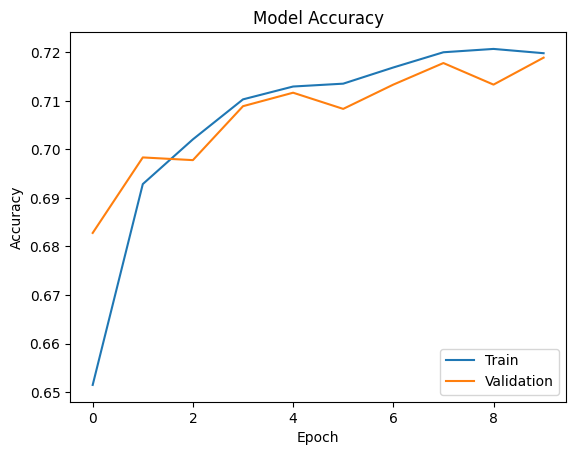

In [ ]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

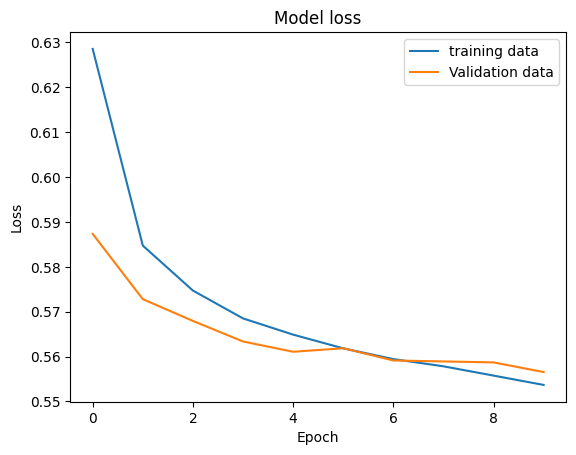

In [ ]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training data', 'Validation data'], loc='upper right')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(xtest, ytest)
print(accuracy)
print(loss)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7302 - loss: 0.5533
0.7292500138282776
0.5513074994087219


In [ ]:
ypred = model.predict(xtest)
ypred.flatten()

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step


array([0.28526205, 0.714738  , 0.3397758 , ..., 0.79636604, 0.8465423 ,
       0.1534577 ], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(ytest , np.argmax(ypred , axis = 1)))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      1985
           1       0.76      0.68      0.72      2015

    accuracy                           0.73      4000
   macro avg       0.73      0.73      0.73      4000
weighted avg       0.73      0.73      0.73      4000



In [ ]:
# prompt: convert ypred as if value is greater than 0.5 it will show and else 0

import numpy as np

ypred_binary = np.where(ypred[:, 1] > 0.5, 1, 0)

# print(classification_report(ytest , ypred_binary))

ypred_binary.flatten().tolist()

[1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,


In [ ]:
import joblib

In [ ]:
model_filename = "ann_model.pkl"
joblib.dump(model, model_filename)

['ann_model.pkl']

In [ ]:
scaler_filename = "scaler.pkl"
joblib.dump(scaler, scaler_filename)

['scaler.pkl']